In [1]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mplsoccer import Pitch, Sbopen
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)

In [2]:
competitionId = 9 # Bundesliga
seasonId = 27 # 2015/2016

matches = sb.matches(competition_id = competitionId, season_id = seasonId)
match_ids = matches['match_id'].tolist()
print(match_ids)
print(len(match_ids))

[3890561, 3890505, 3890511, 3890515, 3890411, 3890397, 3890401, 3890396, 3890384, 3890385, 3890282, 3890287, 3890269, 3890268, 3890402, 3890564, 3890563, 3890562, 3890560, 3890559, 3890558, 3890557, 3890556, 3890555, 3890554, 3890553, 3890552, 3890551, 3890550, 3890549, 3890548, 3890547, 3890546, 3890545, 3890544, 3890543, 3890542, 3890541, 3890540, 3890539, 3890538, 3890537, 3890536, 3890535, 3890534, 3890533, 3890532, 3890531, 3890530, 3890529, 3890528, 3890527, 3890526, 3890525, 3890524, 3890523, 3890522, 3890521, 3890520, 3890519, 3890518, 3890517, 3890516, 3890514, 3890513, 3890512, 3890510, 3890509, 3890508, 3890507, 3890506, 3890504, 3890503, 3890502, 3890501, 3890500, 3890499, 3890498, 3890497, 3890496, 3890495, 3890494, 3890493, 3890492, 3890491, 3890490, 3890489, 3890488, 3890487, 3890486, 3890485, 3890484, 3890483, 3890482, 3890481, 3890480, 3890479, 3890478, 3890477, 3890476, 3890475, 3890474, 3890473, 3890472, 3890471, 3890470, 3890469, 3890468, 3890467, 3890466, 3890465, 

In [3]:
parser = Sbopen()
matchId = 3890259
df, related, freeze, tactics = parser.event(matchId)

df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_goal_assist,shot_first_time,pass_no_touch,shot_deflected,block_deflection,substitution_replacement_id,substitution_replacement_name,dribble_overrun,ball_recovery_offensive,dribble_nutmeg
0,c4e44252-5d93-4482-90e6-0f56bc994a19,1,1,00:00:00,0,0,1,0.000000,3890259,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e3491e02-f2a3-4a56-a311-0a42f3f5ce94,2,1,00:00:00,0,0,1,0.000000,3890259,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0f72ea64-f4b5-4c2c-90b2-041a08b6d1c5,3,1,00:00:00,0,0,1,0.000000,3890259,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,237928b5-fc61-4172-ac62-2b00bb2d82f0,4,1,00:00:00,0,0,1,0.000000,3890259,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e83e4a98-efe5-4760-81e8-ef1efc83d748,5,1,00:00:00.755000,0,0,2,2.077561,3890259,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
teams = df['team_name'].unique()

team1 = df[df['team_name'] == teams[0]]
team2 = df[df['team_name'] == teams[1]]

passesTeam1 = team1[team1['type_name'] == 'Pass']
passesTeam2 = team2[team2['type_name'] == 'Pass']

In [5]:
passesTeam1 = passesTeam1[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]
passesTeam2 = passesTeam2[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]

passesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
23,c819372b-4e0f-4faf-b3be-cf16dc5d05c8,0,5837.0,Douglas Costa de Souza,45.1,19.5,57.4,22.4,8206.0,Arturo Erasmo Vidal Pardo,NaN,NaN
26,16cd6ae4-79f3-4302-9088-011746bc852a,0,8206.0,Arturo Erasmo Vidal Pardo,62.2,25.2,76.4,9.2,5668.0,Robert Lewandowski,NaN,NaN
32,e219987f-f87e-40d0-b6e0-63b107367c1c,0,8220.0,David Olatukunbo Alaba,80.2,0.1,83.4,12.5,8206.0,Arturo Erasmo Vidal Pardo,NaN,NaN
35,58a722bb-6657-4867-b6ee-ad2c7d467748,0,8206.0,Arturo Erasmo Vidal Pardo,81.6,12.2,82.0,5.4,8220.0,David Olatukunbo Alaba,NaN,NaN
39,3c3f584c-16fa-4c82-95fe-492b9c8ef614,0,8220.0,David Olatukunbo Alaba,80.4,5.1,52.2,7.5,5244.0,Medhi Amine El Mouttaqi Benatia,NaN,NaN


In [6]:
successfulPassesTeam1 = passesTeam1[passesTeam1['outcome_name'].isnull()]
successfulPassesTeam2 = passesTeam2[passesTeam2['outcome_name'].isnull()]

successfulPassesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
23,c819372b-4e0f-4faf-b3be-cf16dc5d05c8,0,5837.0,Douglas Costa de Souza,45.1,19.5,57.4,22.4,8206.0,Arturo Erasmo Vidal Pardo,NaN,NaN
26,16cd6ae4-79f3-4302-9088-011746bc852a,0,8206.0,Arturo Erasmo Vidal Pardo,62.2,25.2,76.4,9.2,5668.0,Robert Lewandowski,NaN,NaN
32,e219987f-f87e-40d0-b6e0-63b107367c1c,0,8220.0,David Olatukunbo Alaba,80.2,0.1,83.4,12.5,8206.0,Arturo Erasmo Vidal Pardo,NaN,NaN
35,58a722bb-6657-4867-b6ee-ad2c7d467748,0,8206.0,Arturo Erasmo Vidal Pardo,81.6,12.2,82.0,5.4,8220.0,David Olatukunbo Alaba,NaN,NaN
39,3c3f584c-16fa-4c82-95fe-492b9c8ef614,0,8220.0,David Olatukunbo Alaba,80.4,5.1,52.2,7.5,5244.0,Medhi Amine El Mouttaqi Benatia,NaN,NaN


In [7]:
subsTeam1 = team1[team1['type_name'] == 'Substitution']
subsTeam2 = team2[team2['type_name'] == 'Substitution']

firstSubTeam1 = subsTeam1['minute'].min() if not subsTeam1.empty else 150
firstSubTeam2 = subsTeam2['minute'].min() if not subsTeam2.empty else 150

print(firstSubTeam1, firstSubTeam2)

55 59


In [8]:
successfulPassesTeam1 = successfulPassesTeam1[successfulPassesTeam1['minute'] < firstSubTeam1]
successfulPassesTeam2 = successfulPassesTeam2[successfulPassesTeam2['minute'] < firstSubTeam2]

successfulPassesTeam1.head()  

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
23,c819372b-4e0f-4faf-b3be-cf16dc5d05c8,0,5837.0,Douglas Costa de Souza,45.1,19.5,57.4,22.4,8206.0,Arturo Erasmo Vidal Pardo,NaN,NaN
26,16cd6ae4-79f3-4302-9088-011746bc852a,0,8206.0,Arturo Erasmo Vidal Pardo,62.2,25.2,76.4,9.2,5668.0,Robert Lewandowski,NaN,NaN
32,e219987f-f87e-40d0-b6e0-63b107367c1c,0,8220.0,David Olatukunbo Alaba,80.2,0.1,83.4,12.5,8206.0,Arturo Erasmo Vidal Pardo,NaN,NaN
35,58a722bb-6657-4867-b6ee-ad2c7d467748,0,8206.0,Arturo Erasmo Vidal Pardo,81.6,12.2,82.0,5.4,8220.0,David Olatukunbo Alaba,NaN,NaN
39,3c3f584c-16fa-4c82-95fe-492b9c8ef614,0,8220.0,David Olatukunbo Alaba,80.4,5.1,52.2,7.5,5244.0,Medhi Amine El Mouttaqi Benatia,NaN,NaN


In [9]:
averagePosTeam1 = successfulPassesTeam1.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count'] }).reset_index()
averagePosTeam2 = successfulPassesTeam2.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count']}).reset_index()

averagePosTeam1.columns = ['player_name', 'x', 'y', 'count']
averagePosTeam2.columns = ['player_name', 'x', 'y', 'count']

averagePosTeam1.head()

,player_name,x,y,count
0,Arjen Robben,78.334615,67.611538,26
1,Arturo Erasmo Vidal Pardo,65.453731,31.868657,67
2,David Olatukunbo Alaba,72.044681,13.221277,47
3,Douglas Costa de Souza,75.020000,17.444000,25
4,Jérôme Boateng,53.939286,54.585714,56


In [10]:
passesToTeam1 = successfulPassesTeam1.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam1.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam2 = successfulPassesTeam2.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam2.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam1.head()

,player_name,pass_recipient_name,pass_count
0,Arjen Robben,Arturo Erasmo Vidal Pardo,3
1,Arjen Robben,David Olatukunbo Alaba,1
2,Arjen Robben,Douglas Costa de Souza,2
3,Arjen Robben,Jérôme Boateng,2
4,Arjen Robben,Medhi Amine El Mouttaqi Benatia,1


In [11]:
passesToTeam1['sorted_pair'] = passesToTeam1.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam1.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam1 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam1 = passesBetweenTeam1.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesToTeam2['sorted_pair'] = passesToTeam2.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam2.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam2 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesBetweenTeam1.head()

,player_a,player_b,pass_count
0,Arjen Robben,Arturo Erasmo Vidal Pardo,9
1,Arjen Robben,David Olatukunbo Alaba,2
2,Arjen Robben,Douglas Costa de Souza,3
3,Arjen Robben,Jérôme Boateng,3
4,Arjen Robben,Medhi Amine El Mouttaqi Benatia,2


In [12]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_a', right_on='player_name')
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_a', right_on='player_name')

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count
0,Arjen Robben,Arturo Erasmo Vidal Pardo,9,Arjen Robben,78.334615,67.611538,26
1,Arjen Robben,David Olatukunbo Alaba,2,Arjen Robben,78.334615,67.611538,26
2,Arjen Robben,Douglas Costa de Souza,3,Arjen Robben,78.334615,67.611538,26
3,Arjen Robben,Jérôme Boateng,3,Arjen Robben,78.334615,67.611538,26
4,Arjen Robben,Medhi Amine El Mouttaqi Benatia,2,Arjen Robben,78.334615,67.611538,26


In [13]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_b', right_on='player_name', suffixes=('', '_end'))
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_b', right_on='player_name', suffixes=('', '_end'))

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count,player_name_end,x_end,y_end,count_end
0,Arjen Robben,Arturo Erasmo Vidal Pardo,9,Arjen Robben,78.334615,67.611538,26,Arturo Erasmo Vidal Pardo,65.453731,31.868657,67
1,Arjen Robben,David Olatukunbo Alaba,2,Arjen Robben,78.334615,67.611538,26,David Olatukunbo Alaba,72.044681,13.221277,47
2,Arjen Robben,Douglas Costa de Souza,3,Arjen Robben,78.334615,67.611538,26,Douglas Costa de Souza,75.020000,17.444000,25
3,Arjen Robben,Jérôme Boateng,3,Arjen Robben,78.334615,67.611538,26,Jérôme Boateng,53.939286,54.585714,56
4,Arjen Robben,Medhi Amine El Mouttaqi Benatia,2,Arjen Robben,78.334615,67.611538,26,Medhi Amine El Mouttaqi Benatia,54.172222,31.207407,54


In [14]:
passesBetweenTeam1 = passesBetweenTeam1[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]

passesBetweenTeam1.head()

,player_a,x,y,count,player_b,x_end,y_end,count_end,pass_count
0,Arjen Robben,78.334615,67.611538,26,Arturo Erasmo Vidal Pardo,65.453731,31.868657,67,9
1,Arjen Robben,78.334615,67.611538,26,David Olatukunbo Alaba,72.044681,13.221277,47,2
2,Arjen Robben,78.334615,67.611538,26,Douglas Costa de Souza,75.020000,17.444000,25,3
3,Arjen Robben,78.334615,67.611538,26,Jérôme Boateng,53.939286,54.585714,56,3
4,Arjen Robben,78.334615,67.611538,26,Medhi Amine El Mouttaqi Benatia,54.172222,31.207407,54,2


In [15]:
lineup = parser.lineup(matchId)
team1Lineup = lineup[lineup['team_name'] == teams[0]]
team2Lineup = lineup[lineup['team_name'] == teams[1]]

team1Lineup = team1Lineup[['player_name', 'player_nickname']]
team2Lineup = team2Lineup[['player_name', 'player_nickname']]

team1Lineup.head()

,player_name,player_nickname
0,Pierre-Emile Højbjerg,Pierre-Emile Højbjerg
1,Thiago Alcântara do Nascimento,Thiago Alcântara
2,Medhi Amine El Mouttaqi Benatia,Medhi Benatia
3,Thomas Müller,Thomas Müller
4,Manuel Neuer,Manuel Neuer


In [16]:
averagePosTeam1 = pd.merge(averagePosTeam1, team1Lineup, on='player_name', how='left')
averagePosTeam2 = pd.merge(averagePosTeam2, team2Lineup, on='player_name', how='left')

averagePosTeam1.head()

,player_name,x,y,count,player_nickname
0,Arjen Robben,78.334615,67.611538,26,Arjen Robben
1,Arturo Erasmo Vidal Pardo,65.453731,31.868657,67,Arturo Vidal
2,David Olatukunbo Alaba,72.044681,13.221277,47,David Alaba
3,Douglas Costa de Souza,75.020000,17.444000,25,Douglas Costa
4,Jérôme Boateng,53.939286,54.585714,56,Jérôme Boateng


In [17]:
goals = df[df['type_name'] == 'Shot']
goals = goals[goals['outcome_name'] == 'Goal']
goals = goals[['minute', 'team_name']]

team1Goals = goals[goals['team_name'] == teams[0]]
team2Goals = goals[goals['team_name'] == teams[1]]

team1Goals = team1Goals[team1Goals['minute'] < firstSubTeam1]
team2Goals = team2Goals[team2Goals['minute'] < firstSubTeam2]

team1Goals = len(team1Goals)
team2Goals = len(team2Goals)

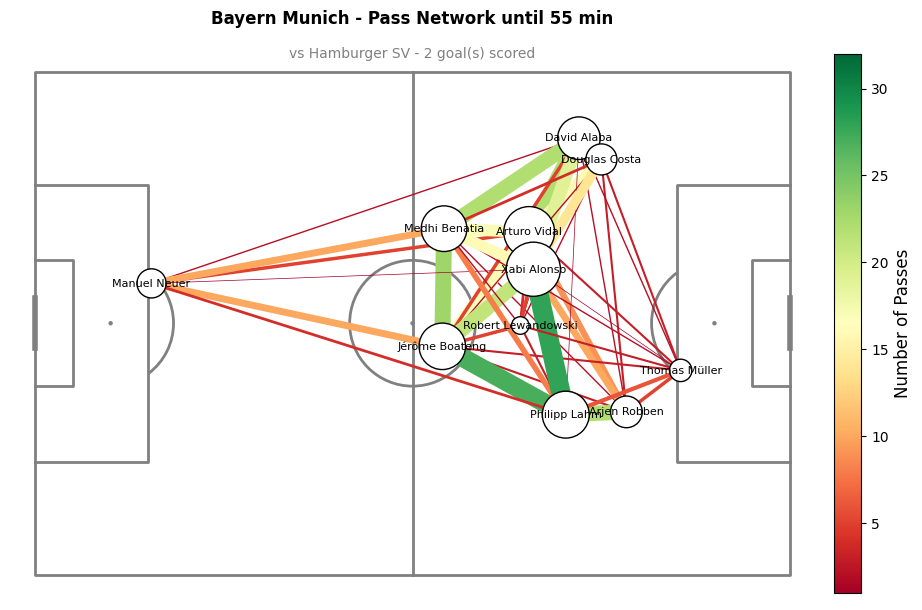

In [18]:
pass_between = passesBetweenTeam1
average_locations = averagePosTeam1
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam1) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - ' + str(team1Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()

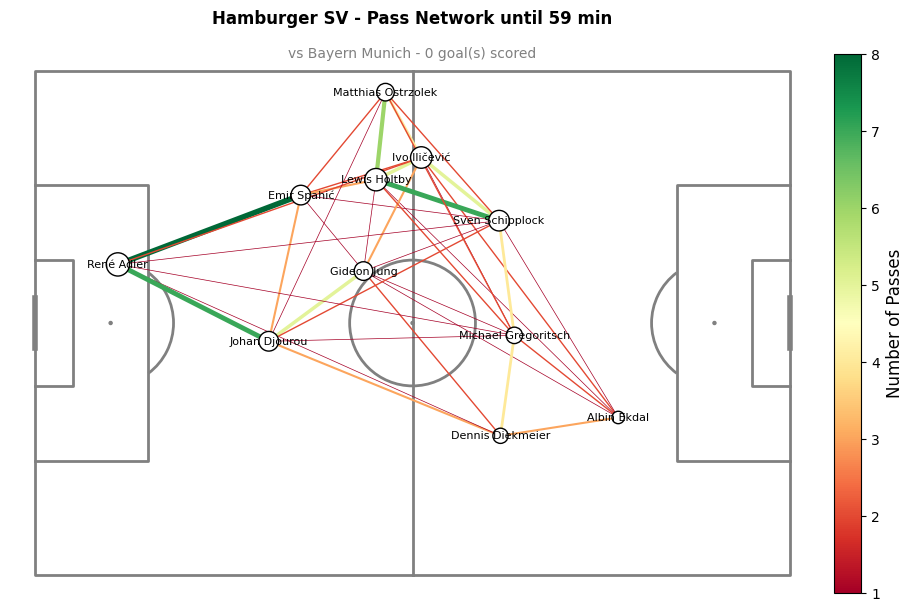

In [19]:
pass_between = passesBetweenTeam2
average_locations = averagePosTeam2
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam2) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - ' + str(team2Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()